In [1]:
conda activate dsi_participant


CondaError: Run 'conda init' before 'conda activate'


Note: you may need to restart the kernel to use updated packages.


Data reference: https://data.ontario.ca/dataset/aggregated-ontario-greenhouse-vegetable-production/resource/ab6ecf23-e711-48c8-ba61-5cae07a3dc3f.

In [2]:
import pandas as pd

# If the file is in the same folder:
df = pd.read_csv("/Users/minamahdian/Desktop/Documents/DSI folder /visualization/data1.csv")

# Show the first few rows
df.head()

,Year,Harvested Area (square feet),Harvested Area (acres),Production ('000 lbs),Production (tonnes),Farm Value ($ '000),Average Price (cents/lb),Average Price ($/tonne)
0,2024,"55,389,902","1,272","268,676","121,870","435,510",162.1,"3,574"
1,2023,"56,301,487","1,293","262,998","119,294","420,597",159.9,"3,526"
2,2022,"49,855,431","1,145","234,364","106,306","371,975",158.7,"3,499"
3,2021,"47,475,516","1,090","229,716","104,198","353,763",154.0,"3,395"
4,2020,"44,701,169","1,026","230,724","104,655","344,637",149.4,"3,293"


In [3]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

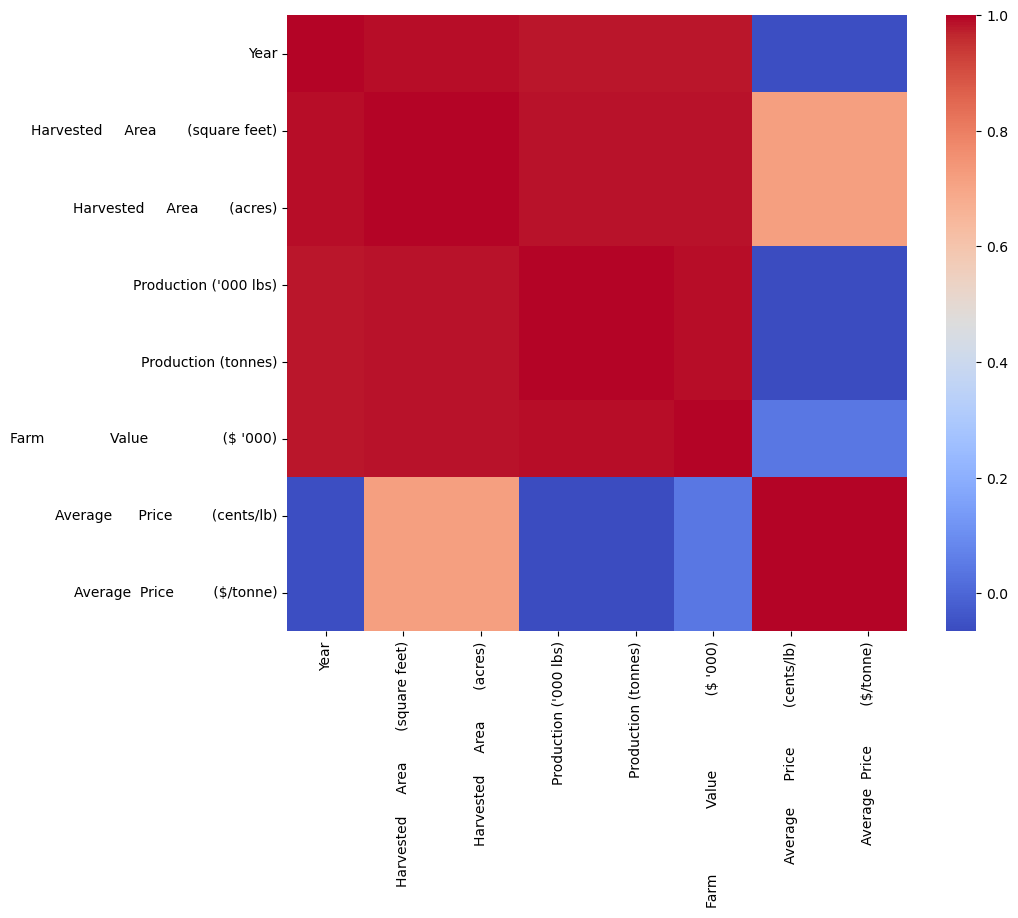

In [7]:
# Assuming 'df' is your DataFrame

# Replace commas in numeric columns and convert to numeric
for column in df.columns:
    # Check if the column dtype is object (likely string) before applying .str
    if df[column].dtype == object:
        df[column] = pd.to_numeric(df[column].str.replace(',', ''), errors='coerce')
    else:
        # If not an object dtype, try converting directly to numeric
        df[column] = pd.to_numeric(df[column], errors='coerce')

# Calculate the correlation matrix
correlation_matrix = df.corr()

# Create the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, cmap='coolwarm')
plt.show()

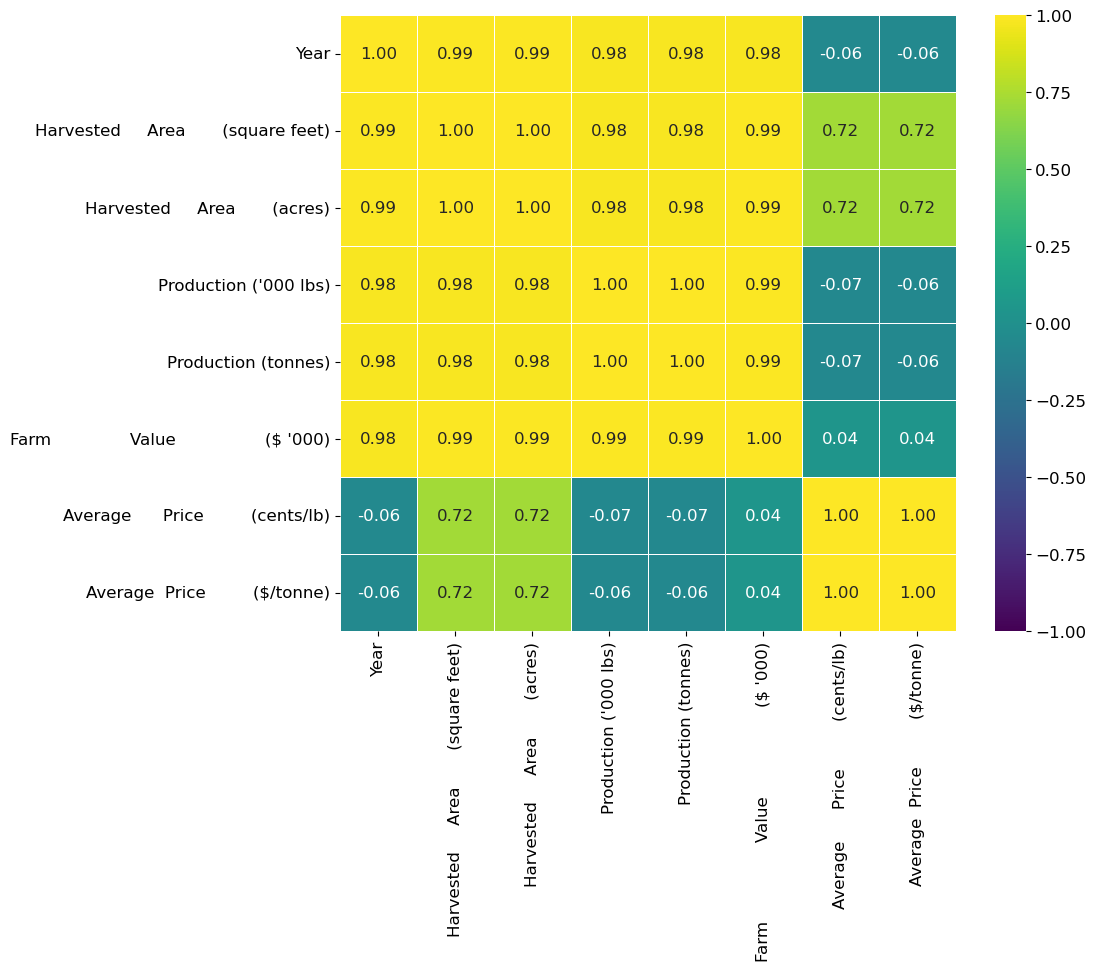

In [8]:
# Create an annotated heatmap
plt.figure(figsize = (10,8))
plt.rcParams.update({'font.size': 12})
sns.heatmap(correlation_matrix, cmap = 'viridis', vmin = -1, vmax = 1, center = 0, annot=True, fmt=".2f", square=True, linewidths=.5)
plt.show()

In [11]:
#Change the name of the coloumns 

print(df.columns)

Index(['Year', 'Harvested     Area       (square feet)',
       'Harvested     Area       (acres)', 'Production ('000 lbs)',
       'Production (tonnes)',
       'Farm               Value                 ($ '000)',
       'Average      Price         (cents/lb)',
       'Average  Price         ($/tonne)'],
      dtype='object')


In [12]:
df.rename(columns={"Harvested     Area       (square feet)": "HarvestedArea(ft2)", "Production (tonnes)": "Production (tonnes)","Average  Price         ($/tonne)":"Price($/tonne)"}, inplace=True)

In [13]:
print(df.columns)

Index(['Year', 'HarvestedArea(ft2)', 'Harvested     Area       (acres)',
       'Production ('000 lbs)', 'Production (tonnes)',
       'Farm               Value                 ($ '000)',
       'Average      Price         (cents/lb)', 'Price($/tonne)'],
      dtype='object')


In [14]:
# visulize Harvested area, Production(tonnes), and Average Price ($/tonne)
# Create a new dataset with selected columns
df1 = df[["HarvestedArea(ft2)", "Production (tonnes)", "Price($/tonne)"]]

# View the new DataFrame
df1.head()

,HarvestedArea(ft2),Production (tonnes),Price($/tonne)
0,55389902.0,121870,3574
1,56301487.0,119294,3526
2,49855431.0,106306,3499
3,47475516.0,104198,3395
4,44701169.0,104655,3293


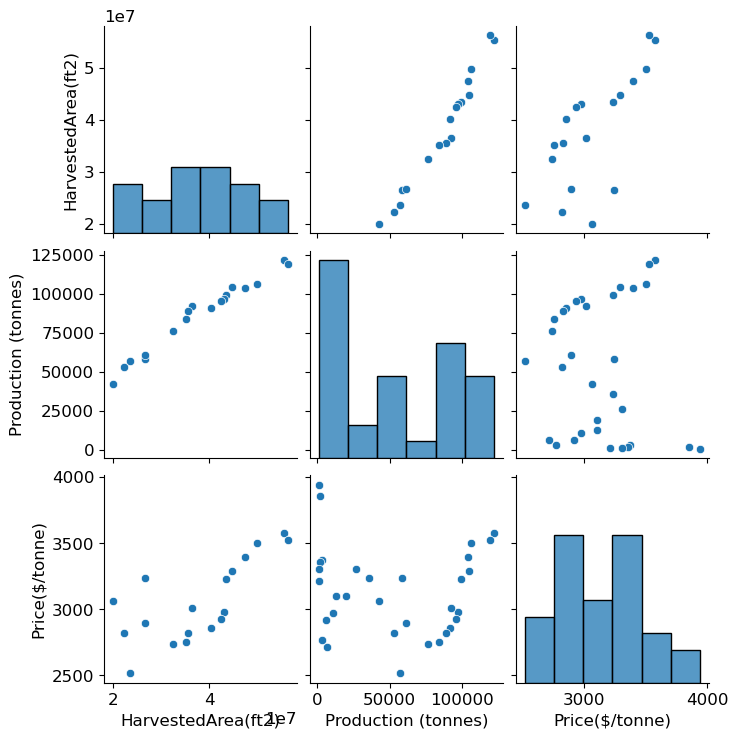

In [15]:
import seaborn as sns

sns.pairplot(df1)

In [18]:
# visulize Harvested area, Production(tonnes), and Average Price ($/tonne)
# Create a new dataset with selected columns
df2 = df[[ "Year","HarvestedArea(ft2)", "Price($/tonne)"]]

# View the new DataFrame
df2.head()

,Year,HarvestedArea(ft2),Price($/tonne)
0,2024,55389902.0,3574
1,2023,56301487.0,3526
2,2022,49855431.0,3499
3,2021,47475516.0,3395
4,2020,44701169.0,3293
